# Name : Sai Nandini Peesapati
This is a code for the dataset "movie killings on-screen". The dataset has around 550 films and it has the number of deaths in the movie. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

In [3]:
# Reading the dataset
data = pd.read_csv('filmdeathcounts.csv')
data.head()



,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7


In [4]:
# checking the shape of the dataset
data.shape

(545, 8)

In [5]:
data.describe()

,Year,Body_Count,Length_Minutes,IMDB_Rating
count,545.000000,545.000000,545.000000,545.000000
mean,1995.387156,72.115596,116.146789,6.835963
std,12.389609,92.630013,22.712811,1.113516
min,1949.000000,1.000000,79.000000,2.000000
25%,1989.000000,15.000000,100.000000,6.200000
50%,1999.000000,44.000000,112.000000,6.900000
75%,2005.000000,93.000000,127.000000,7.600000
max,2013.000000,836.000000,216.000000,9.300000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Film            545 non-null    object 
 1   Year            545 non-null    int64  
 2   Body_Count      545 non-null    int64  
 3   MPAA_Rating     545 non-null    object 
 4   Genre           545 non-null    object 
 5   Director        545 non-null    object 
 6   Length_Minutes  545 non-null    int64  
 7   IMDB_Rating     545 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 34.2+ KB


In [7]:
data.isnull().sum()

Film              0
Year              0
Body_Count        0
MPAA_Rating       0
Genre             0
Director          0
Length_Minutes    0
IMDB_Rating       0
dtype: int64

Since there are no null values, we do not have to deal with the missing values/nulll values. Let's dive deep into the data and visualize the analysis from the dataset.

In [8]:
bins = [0, 5, 7.5, 10]
labels = ['Low', 'Average', 'High']
data['Rating_Category'] = pd.cut(data['IMDB_Rating'], bins=bins, labels=labels, right=False)

data.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Rating_Category
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3,Average
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6,High
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0,Average
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6,Average
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7,High


In [9]:
# Adding new column named "genres"
genres = set('|'.join(data['Genre'].unique()).split('|'))
for genre in genres:
    data[f'is_{genre}'] = data['Genre'].apply(lambda x: 1 if genre in x else 0)


data.head()


,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Rating_Category,is_Drama,...,is_Action,is_Animation,is_Romance,is_Family,is_Comedy,is_Thriller,is_Documentary,is_War,is_Mystery,is_Music
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3,Average,1,...,0,0,0,0,1,0,0,0,0,1
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6,High,0,...,0,0,0,0,0,1,0,0,0,0
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0,Average,0,...,0,0,0,0,0,1,0,0,0,0
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6,Average,0,...,0,0,0,0,0,1,0,0,0,0
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7,High,0,...,1,0,0,0,0,0,0,1,0,0


In [10]:
# Creating a new column to categorize films by decade
data['Decade'] = (data['Year'] // 10 * 10).astype(str) + 's'

data.head()


,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Rating_Category,is_Drama,...,is_Animation,is_Romance,is_Family,is_Comedy,is_Thriller,is_Documentary,is_War,is_Mystery,is_Music,Decade
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3,Average,1,...,0,0,0,1,0,0,0,0,1,2000s
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6,High,0,...,0,0,0,0,1,0,0,0,0,2000s
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0,Average,0,...,0,0,0,0,1,0,0,0,0,2000s
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6,Average,0,...,0,0,0,0,1,0,0,0,0,2000s
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7,High,0,...,0,0,0,0,0,0,1,0,0,2000s


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             545 non-null    object  
 1   Year             545 non-null    int64   
 2   Body_Count       545 non-null    int64   
 3   MPAA_Rating      545 non-null    object  
 4   Genre            545 non-null    object  
 5   Director         545 non-null    object  
 6   Length_Minutes   545 non-null    int64   
 7   IMDB_Rating      545 non-null    float64 
 8   Rating_Category  545 non-null    category
 9   is_Drama         545 non-null    int64   
 10  is_Sport         545 non-null    int64   
 11  is_Fantasy       545 non-null    int64   
 12  is_Western       545 non-null    int64   
 13  is_Horror        545 non-null    int64   
 14  is_Film-Noir     545 non-null    int64   
 15  is_Biography     545 non-null    int64   
 16  is_Sci-Fi        545 non-null    int64   
 1

In [12]:
data.describe()

,Year,Body_Count,Length_Minutes,IMDB_Rating,is_Drama,is_Sport,is_Fantasy,is_Western,is_Horror,is_Film-Noir,...,is_Action,is_Animation,is_Romance,is_Family,is_Comedy,is_Thriller,is_Documentary,is_War,is_Mystery,is_Music
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,...,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,1995.387156,72.115596,116.146789,6.835963,0.403670,0.005505,0.100917,0.042202,0.108257,0.001835,...,0.627523,0.016514,0.045872,0.020183,0.143119,0.484404,0.001835,0.088073,0.082569,0.012844
std,12.389609,92.630013,22.712811,1.113516,0.491083,0.074056,0.301496,0.201234,0.310990,0.042835,...,0.483909,0.127557,0.209399,0.140757,0.350516,0.500216,0.042835,0.283662,0.275482,0.112705
min,1949.000000,1.000000,79.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,15.000000,100.000000,6.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1999.000000,44.000000,112.000000,6.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2005.000000,93.000000,127.000000,7.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2013.000000,836.000000,216.000000,9.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
print(data.head())

# checking the shape of the dataset
print(data.shape)

                   Film  Year  Body_Count MPAA_Rating  \
0  24 Hour Party People  2002           7           R   
1         28 Days Later  2002          53           R   
2        28 Weeks Later  2007         212           R   
3      30 Days of Night  2007          67           R   
4                   300  2007         600           R   

                          Genre                 Director  Length_Minutes  \
0  Biography|Comedy|Drama|Music     Michael Winterbottom             117   
1        Horror|Sci-Fi|Thriller              Danny Boyle             113   
2        Horror|Sci-Fi|Thriller  Juan Carlos Fresnadillo             100   
3               Horror|Thriller              David Slade             113   
4    Action|Fantasy|History|War              Zack Snyder             117   

   IMDB_Rating Rating_Category  is_Drama  ...  is_Animation  is_Romance  \
0          7.3         Average         1  ...             0           0   
1          7.6            High         0  ...     

In [14]:
#converting the updated data to a new dataset.

data.to_csv('updated_death_count_dataset.csv', index=False)

In [15]:
correlation_matrix = data.corr()

correlation_matrix

/var/folders/0n/qqmnpgh93cd_z3ptl2h4znxw0000gn/T/ipykernel_12694/3855999375.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,Year,Body_Count,Length_Minutes,IMDB_Rating,is_Drama,is_Sport,is_Fantasy,is_Western,is_Horror,is_Film-Noir,...,is_Action,is_Animation,is_Romance,is_Family,is_Comedy,is_Thriller,is_Documentary,is_War,is_Mystery,is_Music
Year,1.000000,-0.016899,-0.017611,-0.210817,0.044058,0.011697,0.043653,-0.286001,0.067822,-0.160672,...,0.046173,0.001763,0.065414,0.015539,0.040128,0.182353,0.033296,-0.110669,0.077328,0.035926
Body_Count,-0.016899,1.000000,0.300241,0.070477,0.070176,-0.025282,0.103909,0.050722,0.020304,-0.031557,...,0.132562,-0.004207,-0.052587,-0.047551,-0.132313,-0.286815,-0.009319,0.336538,-0.142000,-0.058248
Length_Minutes,-0.017611,0.300241,1.000000,0.431282,0.244195,-0.055125,0.054742,0.032024,-0.197178,-0.022950,...,-0.080816,-0.106798,0.131540,-0.002078,-0.239315,-0.179717,-0.000277,0.180308,0.027732,-0.030898
IMDB_Rating,-0.210817,0.070477,0.431282,1.000000,0.160646,-0.031384,0.000121,0.054741,-0.154588,0.060277,...,-0.252106,0.037225,-0.016549,0.019990,-0.069257,-0.132981,-0.012948,0.106931,0.068205,0.015354
is_Drama,0.044058,0.070176,0.244195,0.160646,1.000000,0.039880,-0.176323,-0.098297,-0.226485,-0.035275,...,-0.271165,-0.047922,0.087740,-0.091492,-0.186739,-0.056639,-0.035275,0.219370,0.120047,0.072215
is_Sport,0.011697,-0.025282,-0.055125,-0.031384,0.039880,1.000000,-0.024926,-0.015617,-0.025922,-0.003190,...,0.006024,-0.009641,0.102227,-0.010678,0.040411,-0.072112,-0.003190,-0.023121,-0.022319,-0.008486
is_Fantasy,0.043653,0.103909,0.054742,0.000121,-0.176323,-0.024926,1.000000,-0.070325,0.079320,-0.014364,...,0.069124,0.004385,-0.044343,0.211812,0.002234,-0.202849,-0.014364,-0.061130,-0.078377,-0.038216
is_Western,-0.286001,0.050722,0.032024,0.054741,-0.098297,-0.015617,-0.070325,1.000000,-0.073137,-0.009000,...,-0.159191,-0.027200,0.041223,-0.030127,0.018458,-0.148674,-0.009000,-0.033030,-0.062972,-0.023943
is_Horror,0.067822,0.020304,-0.197178,-0.154588,-0.226485,-0.025922,0.079320,-0.073137,1.000000,-0.014939,...,-0.220160,0.001190,-0.076397,-0.050007,0.043102,-0.054118,-0.014939,-0.108281,-0.018701,0.012703
is_Film-Noir,-0.160672,-0.031557,-0.022950,0.060277,-0.035275,-0.003190,-0.014364,-0.009000,-0.014939,1.000000,...,-0.055650,-0.005556,-0.009401,-0.006154,-0.017522,0.044234,-0.001838,-0.013324,0.142915,-0.004891


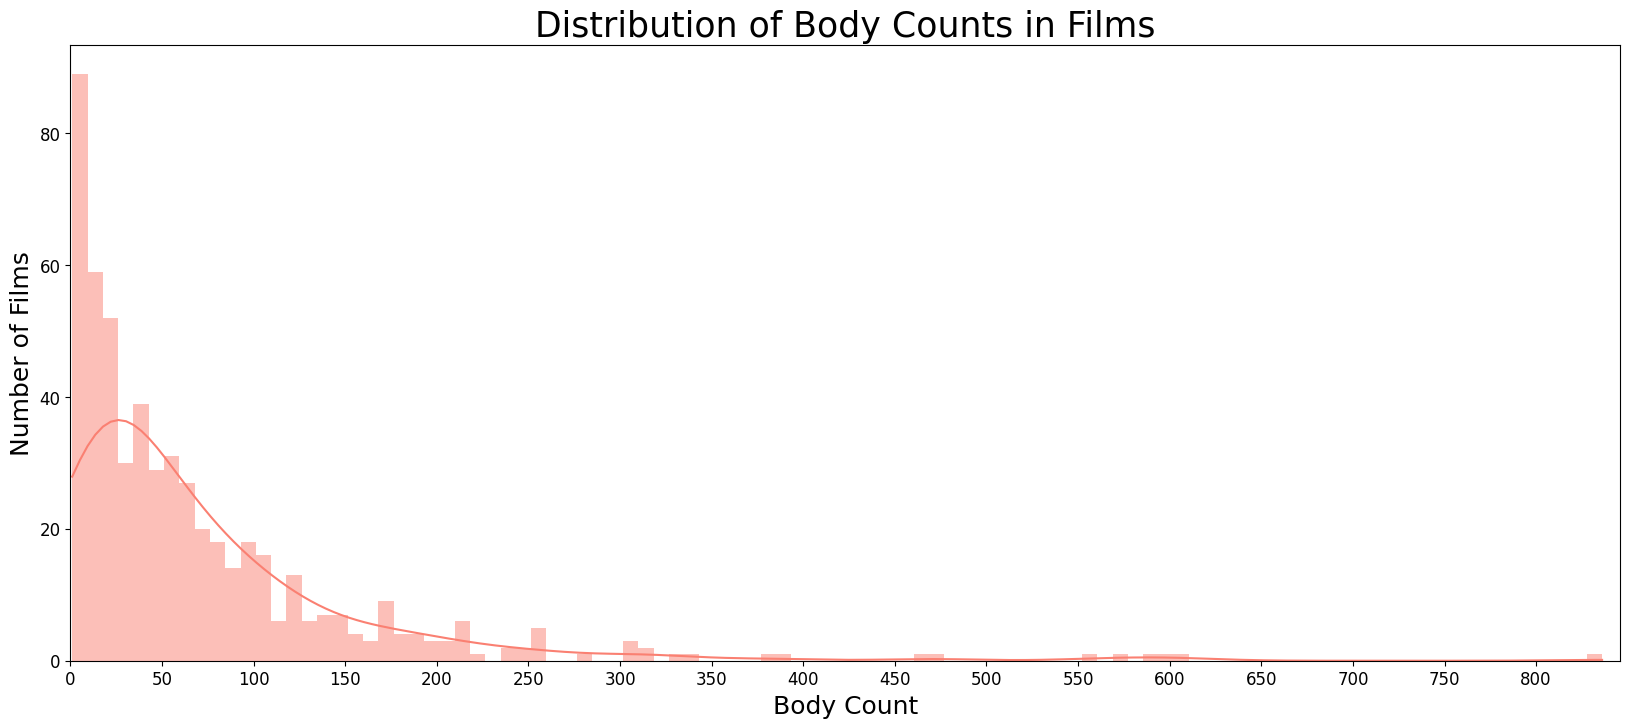

In [16]:
# Distribution of body counts across the movies to understand the general trend in depicting deaths in films.
# Plot the distribution of body counts
plt.figure(figsize=(20, 8))
sns.histplot(data=data, x='Body_Count', kde=True, color='salmon', bins=100, edgecolor='salmon', linewidth=0)
plt.title('Distribution of Body Counts in Films', fontsize=25)
plt.xlabel('Body Count', fontsize=18)
plt.ylabel('Number of Films', fontsize=18)
plt.xticks(ticks=range(0, 900, 50), fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, max(data['Body_Count']) + 10)
plt.show()



In [17]:
skewness = data['Body_Count'].skew()
skewness

#positively skewed distribution

3.463712590555014

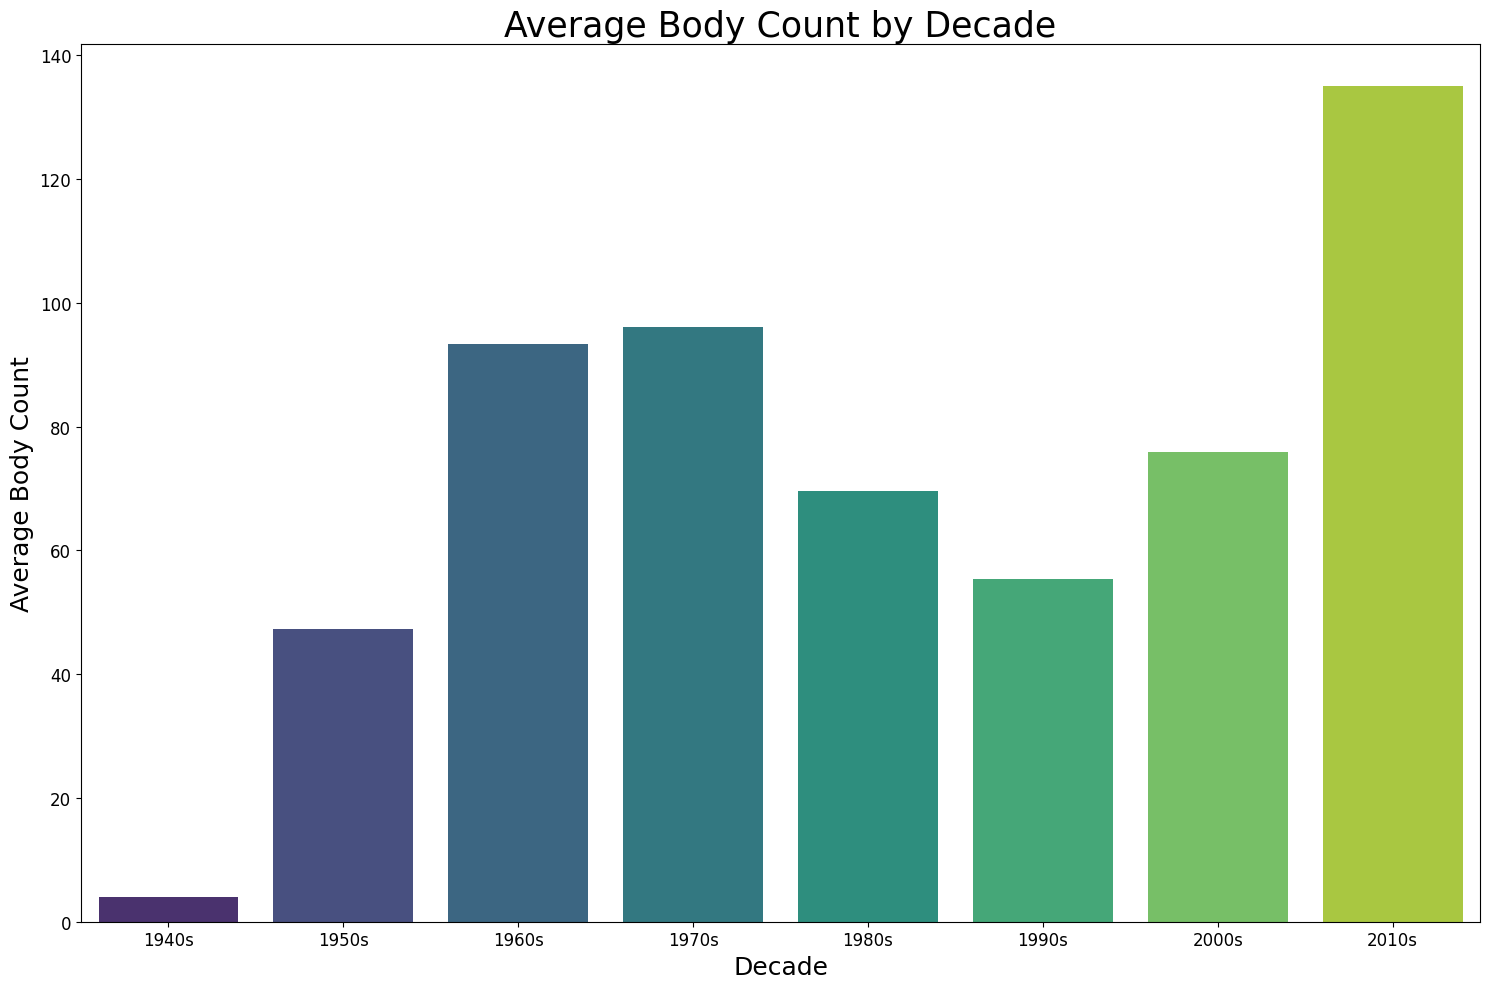

In [18]:
# Calculating the average body count by decade
average_body_count_decade = data.groupby('Decade')['Body_Count'].mean().reset_index()

# # Plotting the average body counts by decade using a bar graph
plt.figure(figsize=(15, 10))
sns.barplot(x='Decade', y='Body_Count', data=average_body_count_decade, palette='viridis', order=sorted(average_body_count_decade['Decade']))
plt.title('Average Body Count by Decade', fontsize=25)
plt.xlabel('Decade', fontsize=18)
plt.ylabel('Average Body Count', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

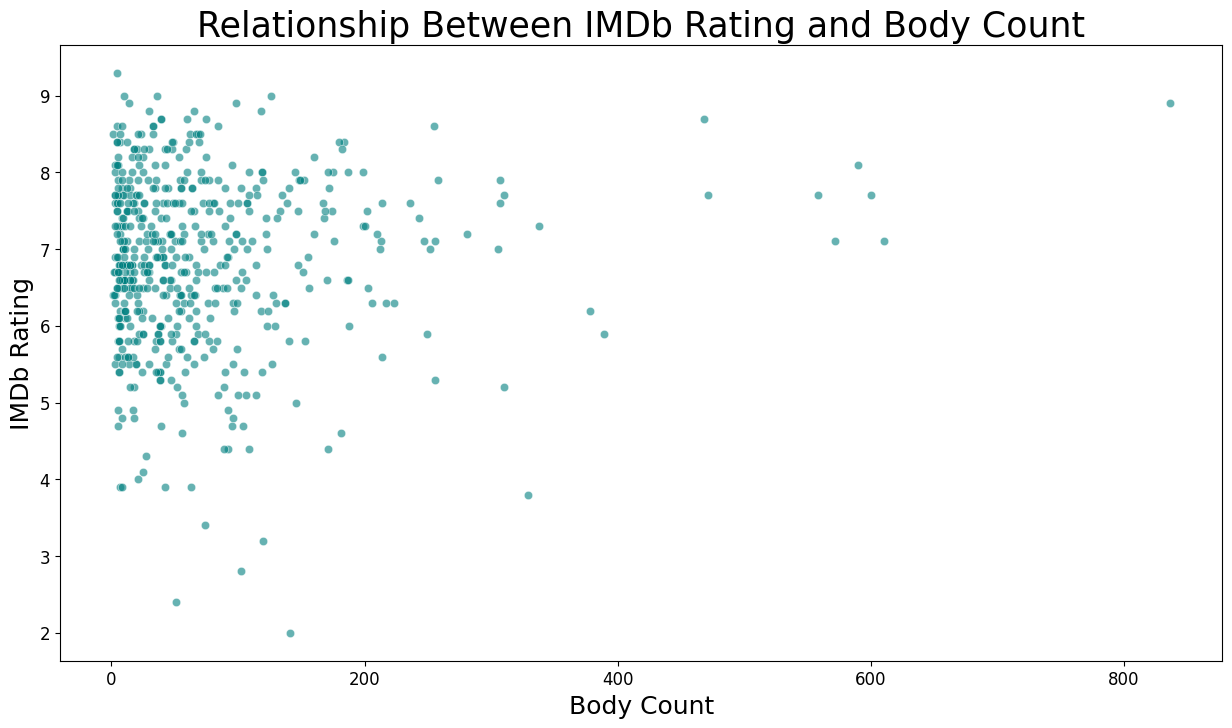

0.07047714914141007

In [19]:
# Relationship between IMDb ratings and body counts.

# Plot the relationship between IMDb rating and body count
plt.figure(figsize=(15, 8))
sns.scatterplot(data=data, x='Body_Count', y='IMDB_Rating', alpha=0.6, color='teal')
plt.title('Relationship Between IMDb Rating and Body Count', fontsize = 25)
plt.ylabel('IMDb Rating', fontsize = 18)
plt.xlabel('Body Count', fontsize = 18)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

# Calculate the correlation coefficient between Body_Count and IMDB_Rating
correlation = data['Body_Count'].corr(data['IMDB_Rating'])
correlation

#From the scatter plot we generated previously, there wasn't a strong linear correlation between IMDb rating and body count. Movies with both high and low body counts were spread across different IMDb ratings, indicating that the number of deaths in a movie doesn't necessarily dictate its rating. A correlation coefficient close to 0 would suggest a weak linear relationship, while values closer to 1 or -1 would suggest strong positive or negative relationships, respectively. In the context of the dataset, even if there's no strong linear correlation, it doesn't mean there's no relationship at all; it could be non-linear or influenced by other factors.



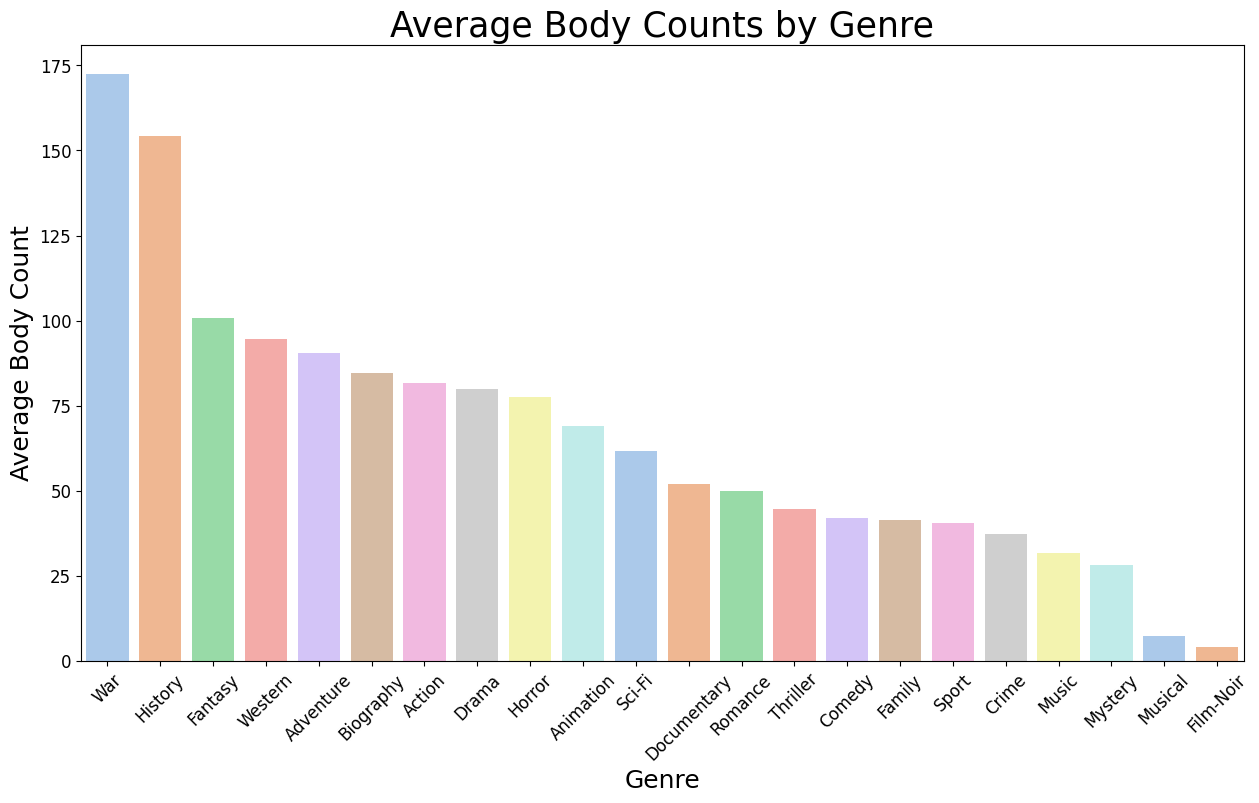

In [20]:
# Finding the average body counts by genre. This can provide insights into which genres tend to have higher or lower average body counts. Note that some movies belong to multiple genres, so we'll need to account for this in our analysis.

# Split the Genre column and calculate the average body count for each genre
genre_data = data.assign(Genre=data['Genre'].str.split('|')).explode('Genre')
avg_body_count_by_genre = genre_data.groupby('Genre').agg({'Body_Count':'mean'}).reset_index().sort_values(by='Body_Count', ascending=False)

# Plot the average body counts by genre
plt.figure(figsize=(15, 8))
sns.barplot(data=avg_body_count_by_genre, x='Genre', y='Body_Count', palette='pastel')
plt.title('Average Body Counts by Genre', fontsize = 25)
plt.ylabel('Average Body Count', fontsize = 18)
plt.xlabel('Genre', fontsize = 18)
plt.xticks(rotation=45,fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()
